# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [225]:
!pip install networkx==2.3

In [226]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import tensorflow 
from tqdm import tqdm
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [227]:
data=pd.read_csv(r"C:\Users\Akashraj D S\Downloads\Clustering_Assignment-20210912T011027Z-001\Clustering_Assignment\movie_actor_network.csv", index_col=False, names=['movie','actor'])

In [228]:
edges = [tuple(x) for x in data.values.tolist()]

In [229]:
print(edges)

[('m1', 'a1'), ('m2', 'a1'), ('m2', 'a2'), ('m3', 'a1'), ('m3', 'a3'), ('m3', 'a4'), ('m3', 'a5'), ('m3', 'a6'), ('m3', 'a7'), ('m4', 'a1'), ('m4', 'a10'), ('m4', 'a8'), ('m4', 'a9'), ('m5', 'a1'), ('m5', 'a11'), ('m5', 'a12'), ('m5', 'a13'), ('m5', 'a14'), ('m5', 'a15'), ('m5', 'a16'), ('m5', 'a17'), ('m5', 'a18'), ('m5', 'a19'), ('m7', 'a21'), ('m7', 'a22'), ('m8', 'a22'), ('m9', 'a22'), ('m9', 'a23'), ('m10', 'a22'), ('m10', 'a24'), ('m10', 'a25'), ('m11', 'a22'), ('m11', 'a26'), ('m11', 'a27'), ('m11', 'a28'), ('m11', 'a29'), ('m24', 'a47'), ('m25', 'a47'), ('m25', 'a48'), ('m25', 'a49'), ('m25', 'a50'), ('m25', 'a51'), ('m25', 'a52'), ('m25', 'a53'), ('m25', 'a54'), ('m25', 'a55'), ('m25', 'a56'), ('m25', 'a57'), ('m25', 'a58'), ('m25', 'a59'), ('m25', 'a60'), ('m25', 'a61'), ('m25', 'a62'), ('m25', 'a63'), ('m25', 'a64'), ('m25', 'a65'), ('m25', 'a66'), ('m25', 'a67'), ('m25', 'a68'), ('m25', 'a69'), ('m25', 'a70'), ('m26', 'a47'), ('m26', 'a71'), ('m26', 'a72'), ('m26', 'a73'), 

In [230]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [231]:
A = list(nx.connected_component_subgraphs(B))[0]

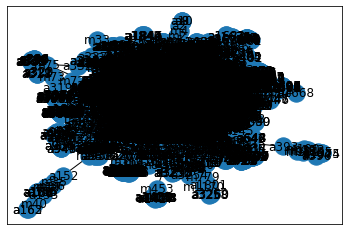

In [232]:
nx.draw_networkx(A)

In [233]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


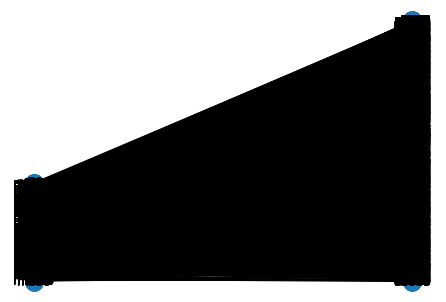

In [234]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [235]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [236]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [237]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [238]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [239]:
model.wv.vectors

array([[ 4.6915555e-01, -1.2712038e+00,  6.3204956e-01, ...,
         4.7848403e-02, -2.3684406e+00,  1.6412626e-01],
       [-2.0563190e-01, -1.4798552e+00,  6.7323782e-02, ...,
        -6.8642223e-01, -1.8827772e+00, -7.4962795e-02],
       [ 7.9339838e-01, -1.2026236e+00,  5.0158346e-01, ...,
        -1.4579618e+00, -1.0142347e+00,  1.4987941e+00],
       ...,
       [ 8.4166527e-02,  3.1763609e-02, -1.5603548e-01, ...,
        -7.2773822e-02, -5.8248963e-02, -5.8045108e-03],
       [ 3.1770967e-02,  1.3938428e-01, -1.0261088e-01, ...,
         9.6660722e-03, -6.2742792e-02, -1.3953586e-02],
       [-3.1827148e-03, -1.1344484e-02, -6.3864589e-02, ...,
         3.2290429e-02, -2.3806099e-02, -1.6009582e-03]], dtype=float32)

In [240]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

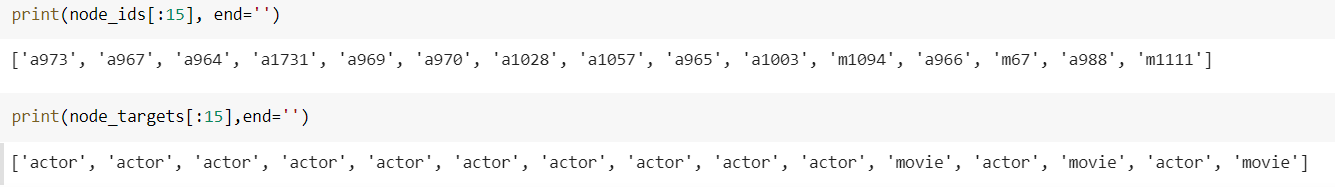

In [241]:
len(node_ids)

4703

In [242]:
len(node_embeddings)

4703

In [243]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for index in range(0,len(node_targets)):
        if node_targets[index]=='actor':
            actor_nodes.append(node_ids[index])
            actor_embeddings.append(node_embeddings[index])
        else:
            movie_nodes.append(node_ids[index])
            movie_embeddings.append(node_embeddings[index])
    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [244]:
actor_nodes, movie_nodes, actor_embeddings, movie_embeddings = data_split(node_ids, node_targets, node_embeddings)

In [245]:
len(actor_embeddings[0])

128

<font color='cyan'>Grader function - 1</font>

In [246]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [247]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [248]:
def cost1(graph,number_of_clusters):
    num_of_nodes=len(max(nx.connected_components(graph)))
    total_nodes=len(graph.nodes)
    cost1=(num_of_nodes/total_nodes)*(1/number_of_clusters)
    return cost1

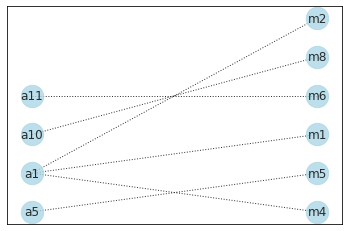

In [249]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [250]:
len(max(nx.connected_components(graded_graph)))

4

<font color='cyan'>Grader function - 3</font>

In [251]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [267]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    s = 0
    nodes = []
    for i in graph.nodes:
        if 'm' in i:
            s = s + graph.degree(i)
            nodes.append(i)       
    nodes = set(nodes)       
    cost2= (s/len(nodes))*(1/number_of_clusters)
    
    return cost2

In [268]:
graded_cost2=cost2(graded_graph,3)

<font color='cyan'>Grader function - 4</font>

In [269]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [270]:
x = np.array(actor_embeddings)
metrics_values_actors={}
for k in tqdm([3,5,10,30,50,100,200,500]):
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(x)
    
    nodes_and_values = dict(zip(actor_nodes,model.labels_))
    cost_1,cost_2=0,0
    for i in range(k):
        nodes=[]
        for key,value in nodes_and_values.items():
            if value==i:
                nodes.append(key)
        graph = nx.Graph()
        for node in nodes:
            subgraph = nx.ego_graph(A,node)
            graph.add_nodes_from(subgraph.nodes())
            graph.add_edges_from(subgraph.edges())
        cost_1 = cost_1 + cost1(graph,k)
        cost_2 = cost_2 + cost2(graph,k)
    metrics_values_actors[k]=cost_1*cost_2

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:32<00:00, 11.52s/it]


In [271]:
metrics_values_actors

{3: 3.739970988944665,
 5: 2.5394827778971996,
 10: 2.155328241264024,
 30: 1.7107027747194217,
 50: 1.4980204889834579,
 100: 1.542209612129801,
 200: 1.642618126338972,
 500: 1.7519960787573017}

<font color='blue'>Displaying similar actor clusters</font>

In [272]:
values = list(metrics_values_actors.values())
keys = list(metrics_values_actors.keys())
best_k = keys[values.index(max(values))]
best_k

3

In [273]:
model = KMeans(n_clusters=best_k,random_state=42)
model.fit(x)
target_actors = model.predict(actor_embeddings)

In [274]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

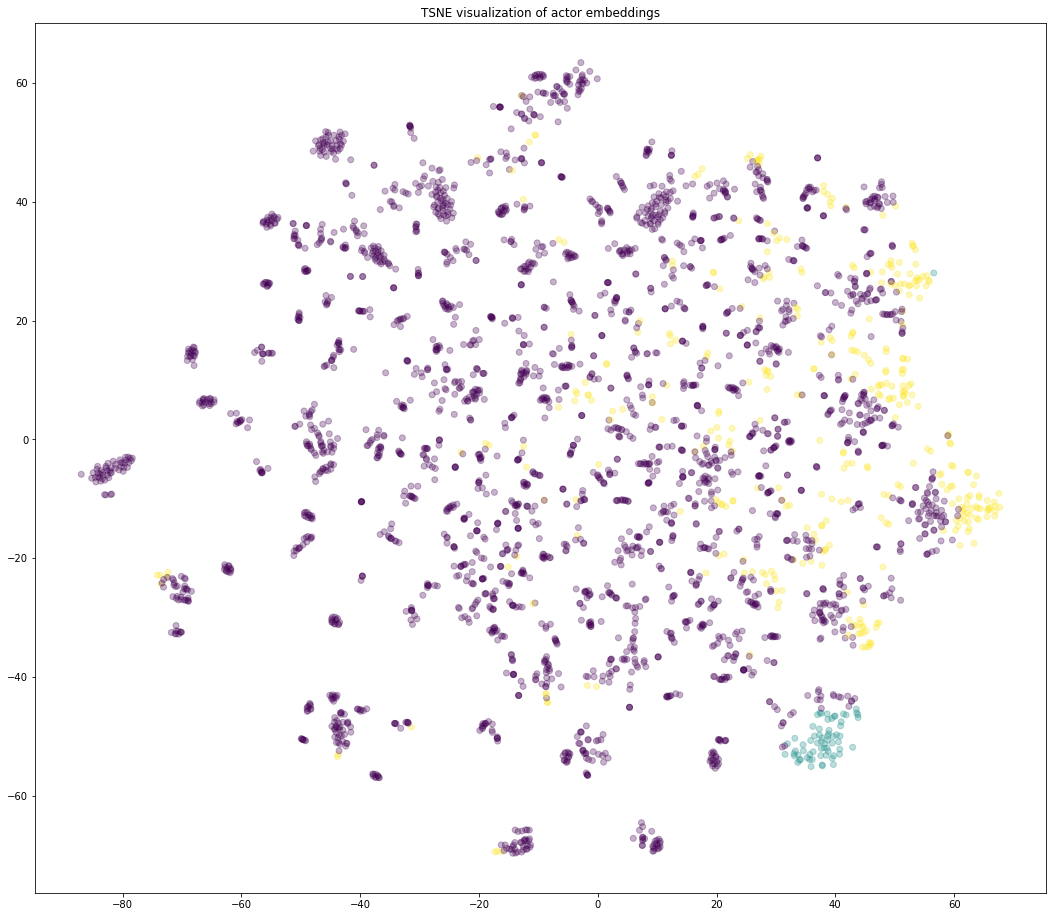

In [275]:
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(actor_embeddings_2d[:,0],
            actor_embeddings_2d[:,1],
            c=target_actors, 
            alpha=0.3
            )
plt.title('{} visualization of actor embeddings'.format(transform.__name__))
plt.show()


<font color='blue'>Grouping similar movies</font>

In [276]:
x = np.array(movie_embeddings)
metrics_values_movies={}
for k in tqdm([3,5,10,30,50,100,200,500]):
    model = KMeans(n_clusters = k, random_state=42)
    model.fit(x)
    
    nodes_and_values = dict(zip(movie_nodes,model.labels_))
    cost_1,cost_2=0,0
    for i in range(k):
        nodes=[]
        for key,value in nodes_and_values.items():
            if value==i:
                nodes.append(key)
        graph = nx.Graph()
        for node in nodes:
            subgraph = nx.ego_graph(A,node)
            graph.add_nodes_from(subgraph.nodes())
            graph.add_edges_from(subgraph.edges())
        cost_1 = cost_1 + cost1(graph,k)
        cost_2 = cost_2 + cost2(graph,k)
    metrics_values_movies[k]=cost_1*cost_2

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:44<00:00,  5.62s/it]


In [277]:
metrics_values_movies

{3: 8.367147309666422,
 5: 8.971438421519355,
 10: 7.789796202585254,
 30: 11.904422367122052,
 50: 12.421733428034399,
 100: 13.346011205874463,
 200: 12.69240611840527,
 500: 10.316013787857262}

<font color='blue'>Displaying similar movie clusters</font>

In [278]:
values = list(metrics_values_movies.values())
keys = list(metrics_values_movies.keys())
best_k = keys[values.index(max(values))]
best_k

100

In [279]:
model = KMeans(n_clusters=best_k,random_state=42)
model.fit(x)
target_movies = model.predict(movie_embeddings)

In [280]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)

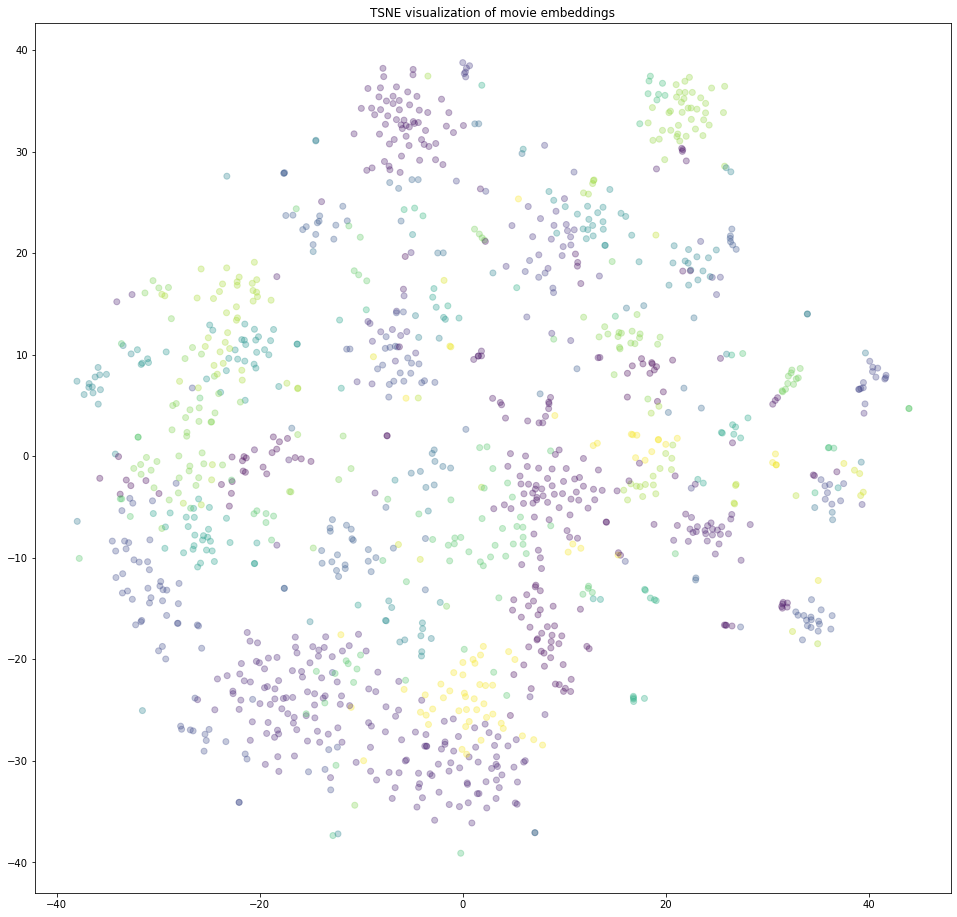

In [281]:
plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(movie_embeddings_2d[:,0],
            movie_embeddings_2d[:,1],
            c=target_movies, 
            alpha=0.3
            )
plt.title('{} visualization of movie embeddings'.format(transform.__name__))
plt.show()